In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [3]:
%cd /mydrive/yolo

/content/gdrive/My Drive/yolo


In [4]:
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [5]:
%cd /mydrive/yolo/darknet/data

/content/gdrive/My Drive/yolo/darknet/data


In [6]:
# !unzip obj.zip

In [7]:
%cd ../..

/content/gdrive/My Drive/yolo


In [8]:
# from typing import Counter
# #divide dataset into train and test
# import glob
# import os
# import numpy as np
# import sys
# current_dir = "/mydrive/yolo/darknet/data/obj"
# split_rt= 10;
# #create two files
# file_train= open("darknet/data/train.txt","w")  #records of all records used for training
# file_test= open("darknet/data/test.txt","w")      #list of all the locations of images and text file for testing
# counter=1
# index_test = round(100 / split_rt)
# for pathAndFilename in glob.iglob(os.path.join(current_dir, "*.jpg")):
#     title, ext = os.path.splitext(os.path.basename(pathAndFilename))
#     if counter==index_test:
#         counter=1
#         file_test.write(current_dir + "/" + title + '.jpg' + "\n")
#     else:
#         file_train.write(current_dir + "/" + title + '.jpg'+ "\n")
#         counter = counter + 1
# file_train.close()
# file_test.close()

In [9]:
# import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec
# import glob
# import os

# def read_label(image_path):
#   file_name = image_path.replace('.jpg', '.txt')
#   with open(file_name, 'rt') as file:
#     print(os.path.basename(file_name) + ': \n' + file.read())

# image_path = glob.glob("darknet/data/obj/*.jpg")
# fig = plt.figure(figsize=(12,8))
# cols = 2
# rows = 2
# grid = gridspec.GridSpec(nrows=rows, ncols=cols, figure=fig)
# for i in range(cols*rows):
#   fig.add_subplot(grid[i])
#   image=plt.imread(image_path[i])
#   plt.title(os.path.basename(image_path[i]))
#   plt.axis(False)
#   plt.imshow(image)
#   read_label(image_path[i])

# plt.savefig("dataset_examples.jpg", dpi=300)


In [10]:
%cd darknet/data/
# !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.weights

/content/gdrive/My Drive/yolo/darknet/data


In [11]:
%cd ..

/content/gdrive/My Drive/yolo/darknet


In [12]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

In [13]:
# !make

In [14]:
!chmod +x ./darknet

In [15]:
# !./darknet detector train data/obj.data cfg/yolov4-tiny-custom.cfg -dont_show

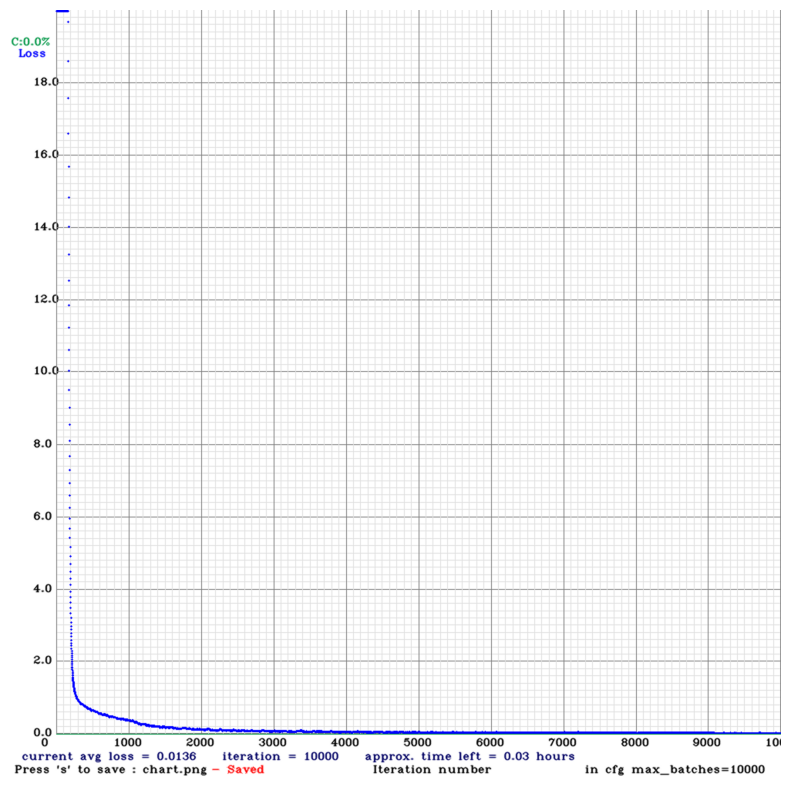

In [16]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
imShow('chart.png')

In [19]:
img_path = "/content/gdrive/MyDrive/yolo/darknet/data/testv4.jpg"
!./darknet detector test data/obj.data cfg/yolov4-tiny-custom-test.cfg data/yolov4-tiny-custom_10000.weights {img_path} -dont-show


 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	     

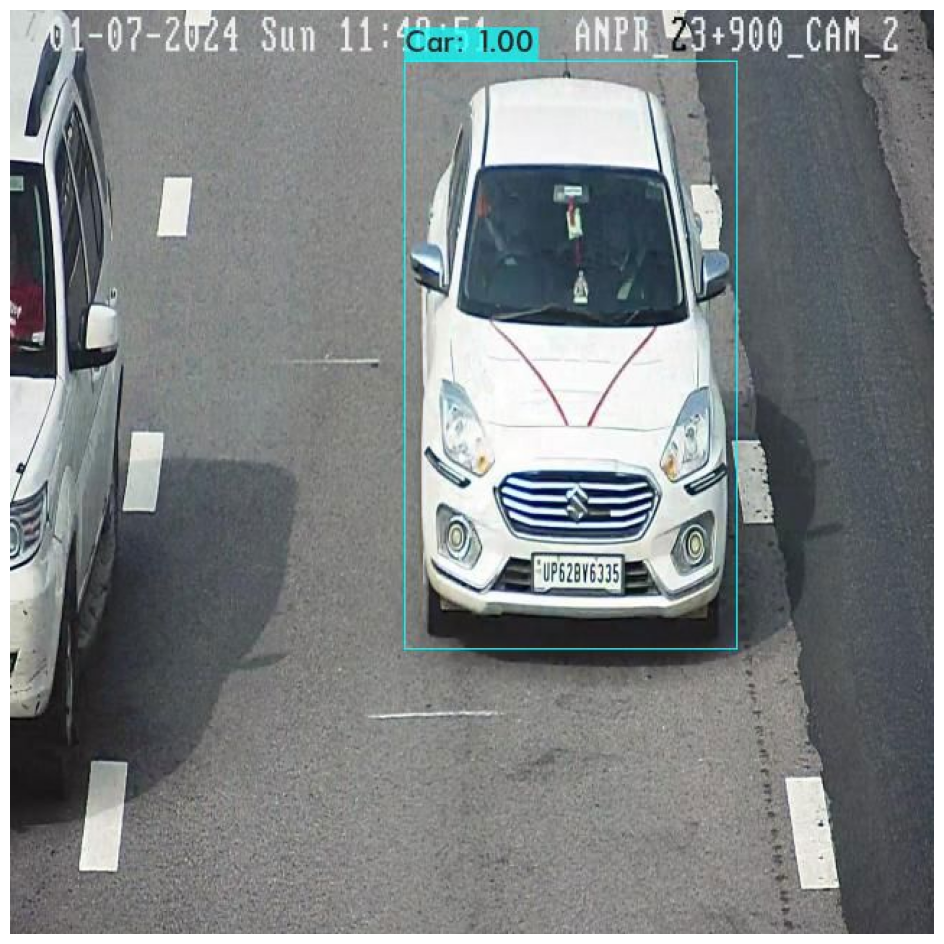

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
plt.axis(False)
processed_image = plt.imread("./predictions.jpg")
plt.imshow(processed_image)
